# Introduction

- Notebook by a combination of group members

This notebook imports the csv file provided by the [Mass Mobilization Project website](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HTTWYL).  Which was downloaded to our folder.

Basic EDA is performed on the file to generally understand what the dataset looks like.

The dataframe has basic cleaning and feature engineering on it:
 * Remove null values
 * Add a total days column (based on the start date and end date columns
 * Add dummied columns related to the 4 protester demand columns and 7 state response columns

Additional EDA is performed to review the cleaned/modified dataframe.

The cleaned/modified dataframe is exported for use in other files.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/mmALL_073119_csv.csv')

# Basic Review of the Dataframe

In [2]:
df.head(2)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...


In [3]:
df.shape

(16363, 31)

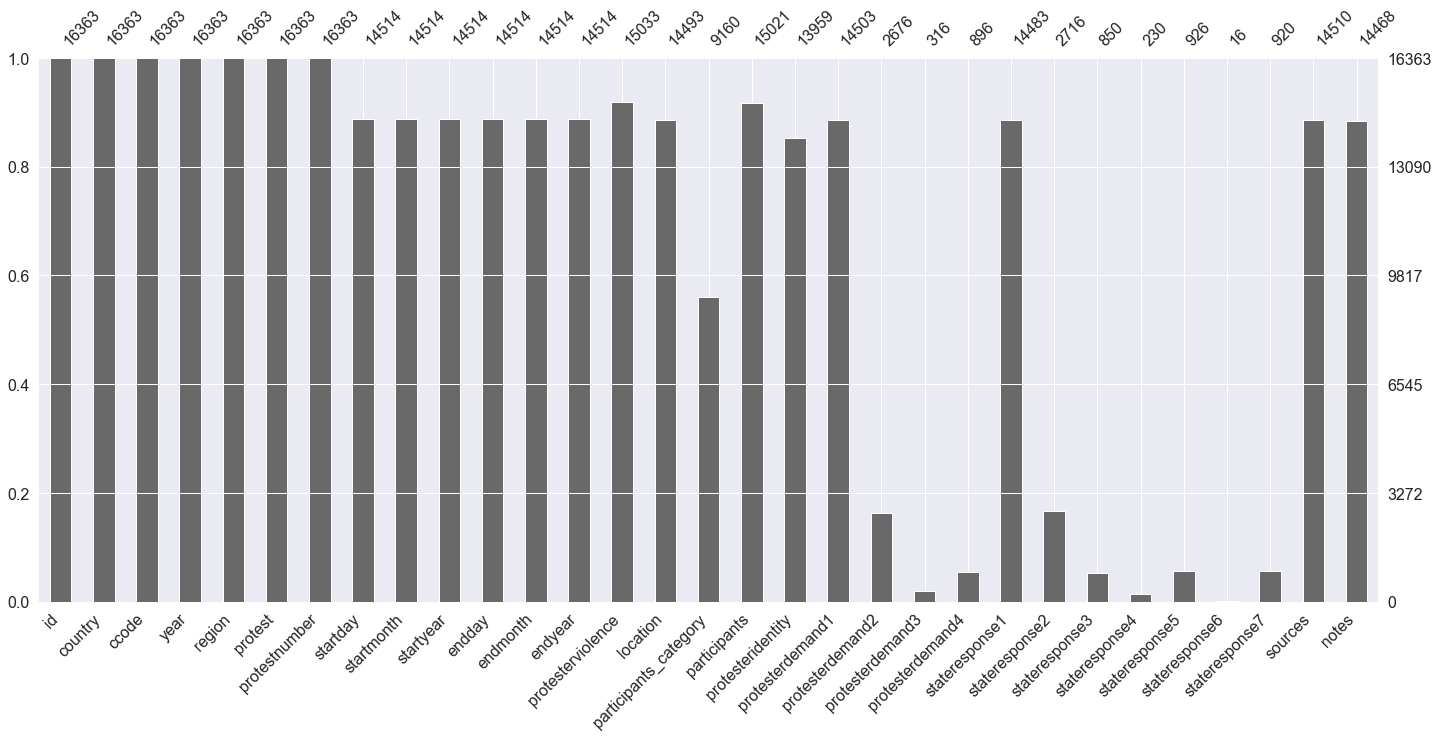

In [4]:
sns.set()
msno.bar(df);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16363 non-null  int64  
 1   country                16363 non-null  object 
 2   ccode                  16363 non-null  int64  
 3   year                   16363 non-null  int64  
 4   region                 16363 non-null  object 
 5   protest                16363 non-null  int64  
 6   protestnumber          16363 non-null  int64  
 7   startday               14514 non-null  float64
 8   startmonth             14514 non-null  float64
 9   startyear              14514 non-null  float64
 10  endday                 14514 non-null  float64
 11  endmonth               14514 non-null  float64
 12  endyear                14514 non-null  float64
 13  protesterviolence      15033 non-null  float64
 14  location               14493 non-null  object 
 15  pa

In [6]:
# Create list of columns depending on what they define

categorical_columns = ['country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'protesterviolence',  'participants_category',
       'participants', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7']

numerical_columns = ['startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',]

id_columns = ['id','sources','notes', 'protesteridentity', 'location']


# Create a function to plot all the categories

def bar_plot(df, columns):
    for category in columns:

        y_names = df[category].value_counts().index
        width = df[category].value_counts()

        plt.figure(figsize=(6,(len(y_names)/4)))
        plt.barh(y_names,width)
        plt.title('Category is: ' + category)
        plt.ylabel('Category Names')
        plt.xlabel('Number of values in a category')
        plt.show()

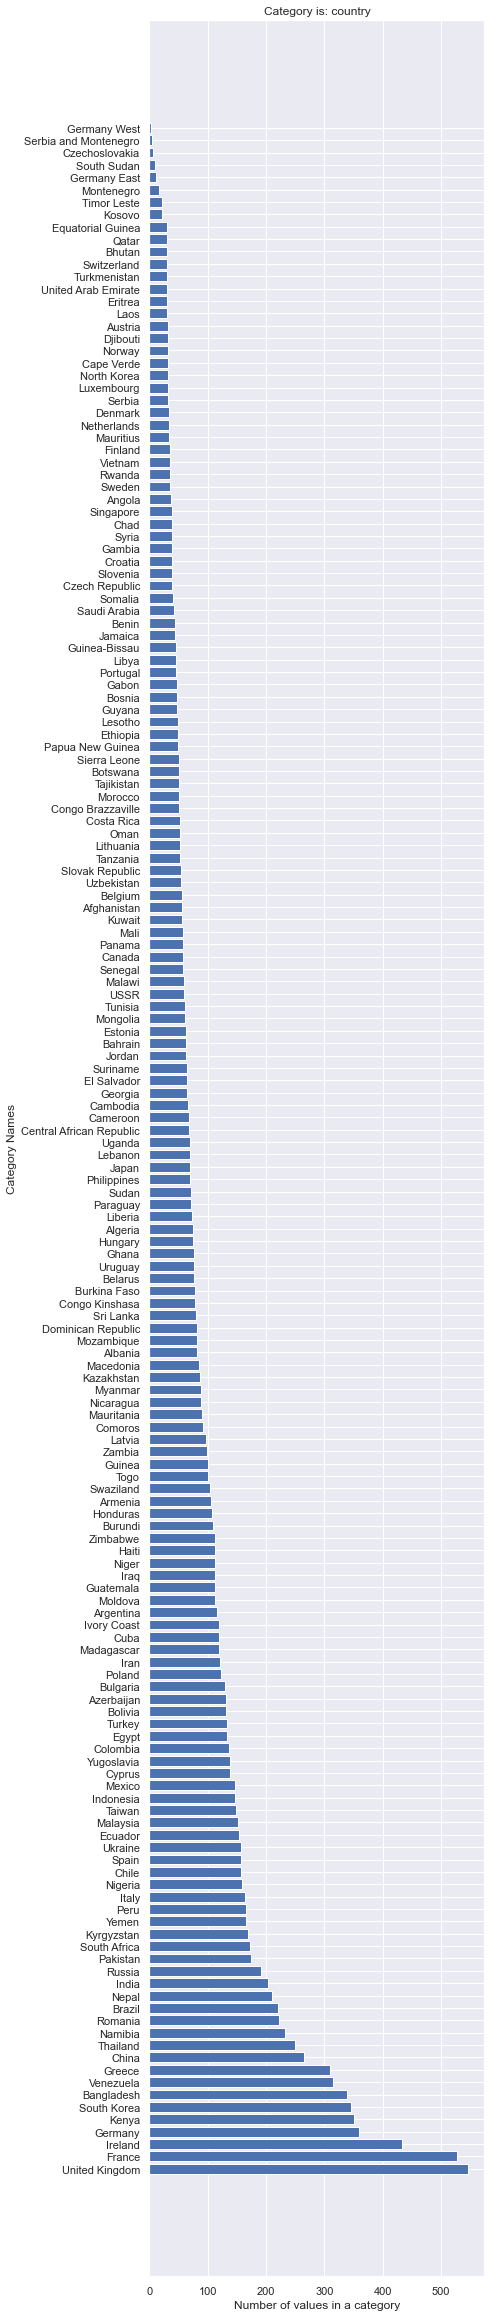

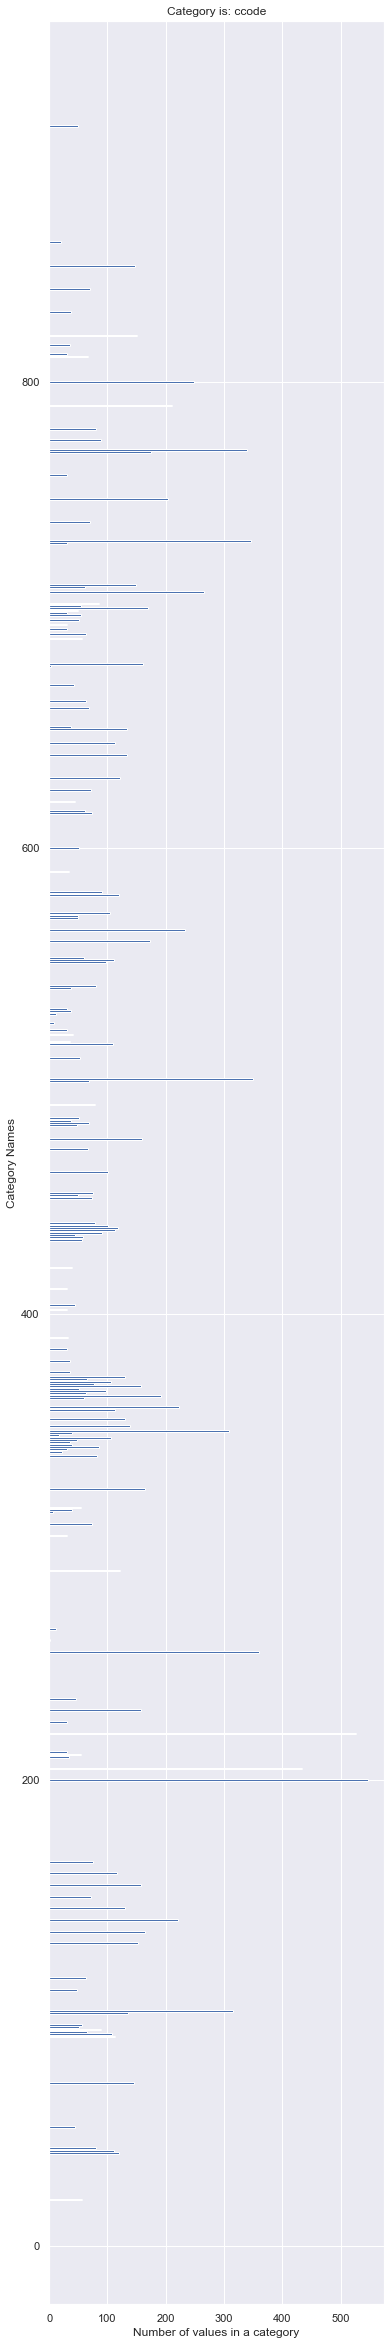

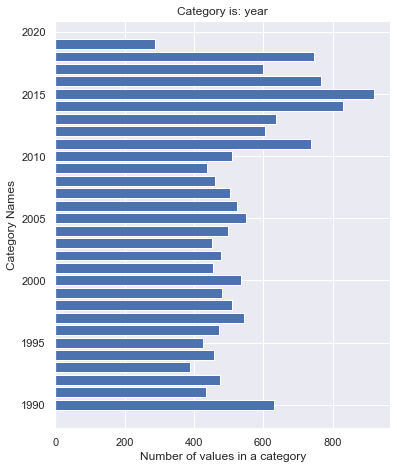

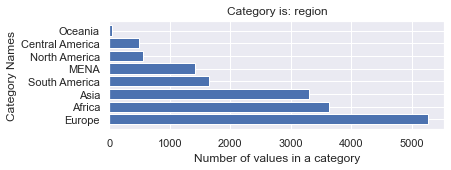

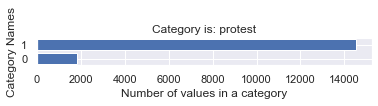

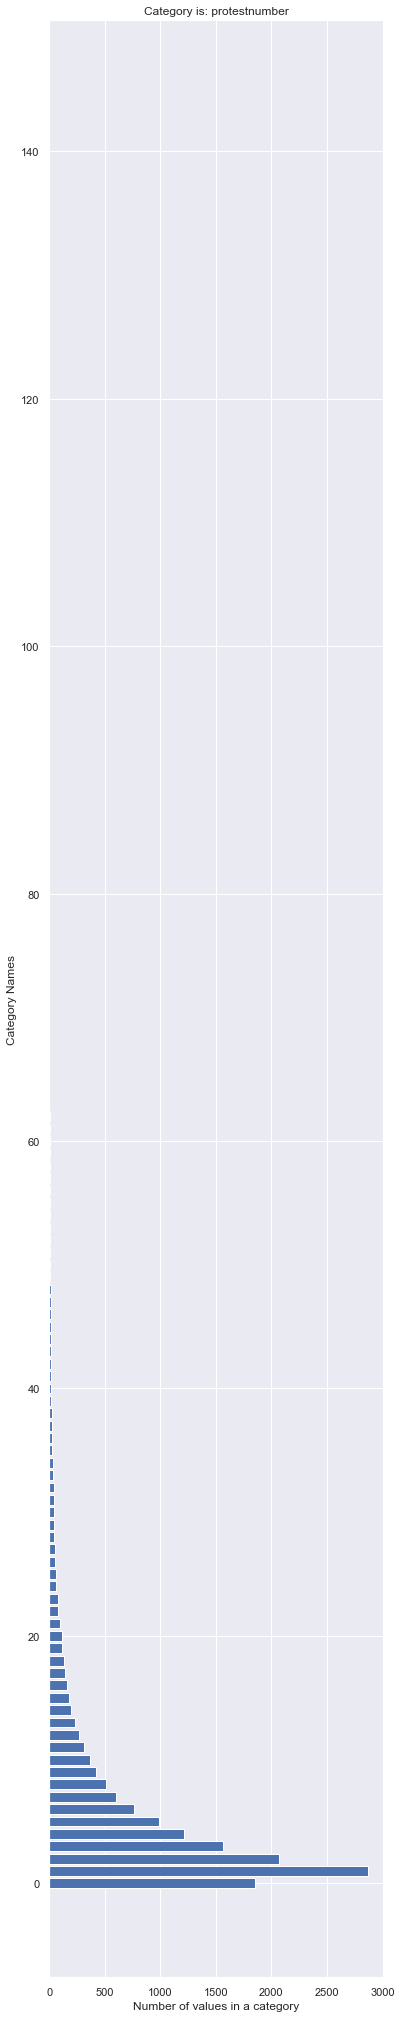

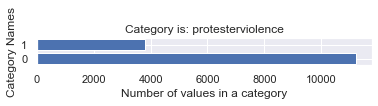

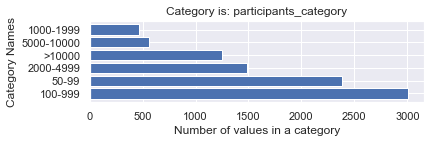

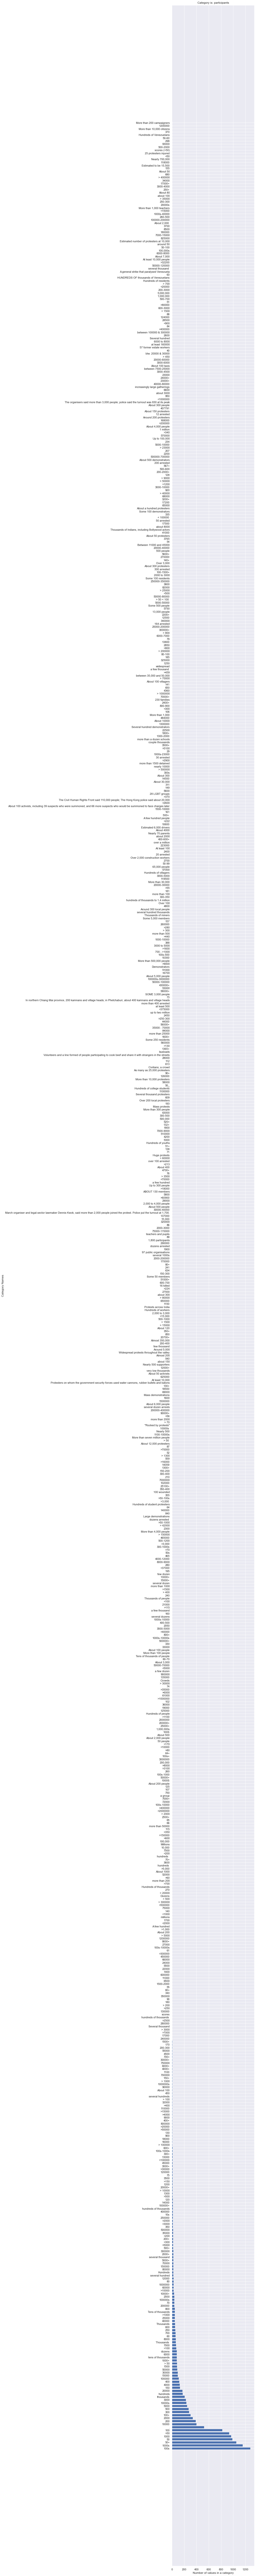

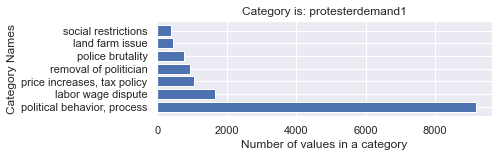

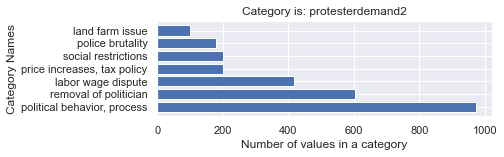

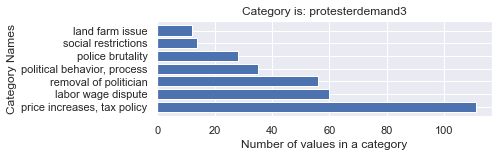

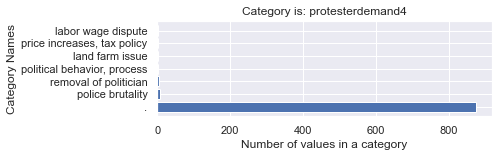

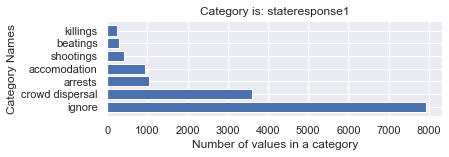

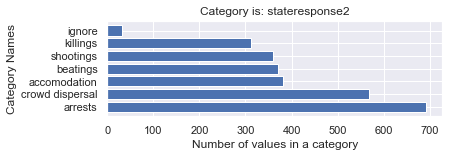

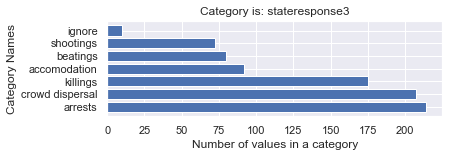

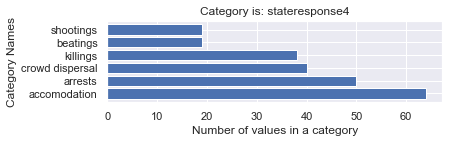

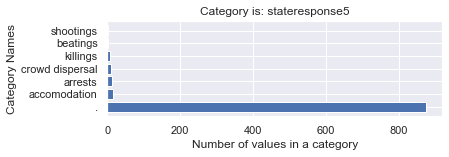

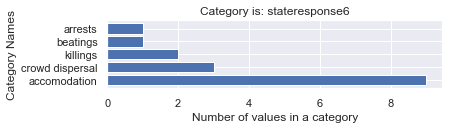

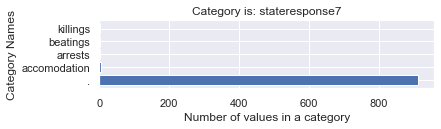

In [7]:
bar_plot(df, categorical_columns)

# Preliminary Data Cleaning

In [8]:
# convert na to 999 so models will run on it

for column in categorical_columns:
    df[column].fillna('999', inplace=True)
for column in numerical_columns:
    df[column].fillna(999, inplace=True)

In [9]:
# Data engineering: length of protests
df['years'] = df['endyear'] - df['startyear']
df['months'] = df['endmonth'] - df['startmonth']
df['days'] = df['endday'] - df['startday']
df['total_days'] = df['days'] + (df['months']*30.5) + (df['years']*365)

In [10]:
protest_demands = ['protesterdemand1','protesterdemand2', 'protesterdemand3', 'protesterdemand4']
state_responses = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4','stateresponse5', 'stateresponse6', 'stateresponse7']

In [11]:
protest_demands_portion = pd.get_dummies(protest_demands, prefix="dem")
state_response_portion = pd.get_dummies(state_responses, prefix='resp')
df = pd.concat([df,protest_demands_portion,state_response_portion], axis = 1)

# Additional EDA to review newly cleaned dataframe

In [12]:
df.head(2)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,dem_protesterdemand2,dem_protesterdemand3,dem_protesterdemand4,resp_stateresponse1,resp_stateresponse2,resp_stateresponse3,resp_stateresponse4,resp_stateresponse5,resp_stateresponse6,resp_stateresponse7
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


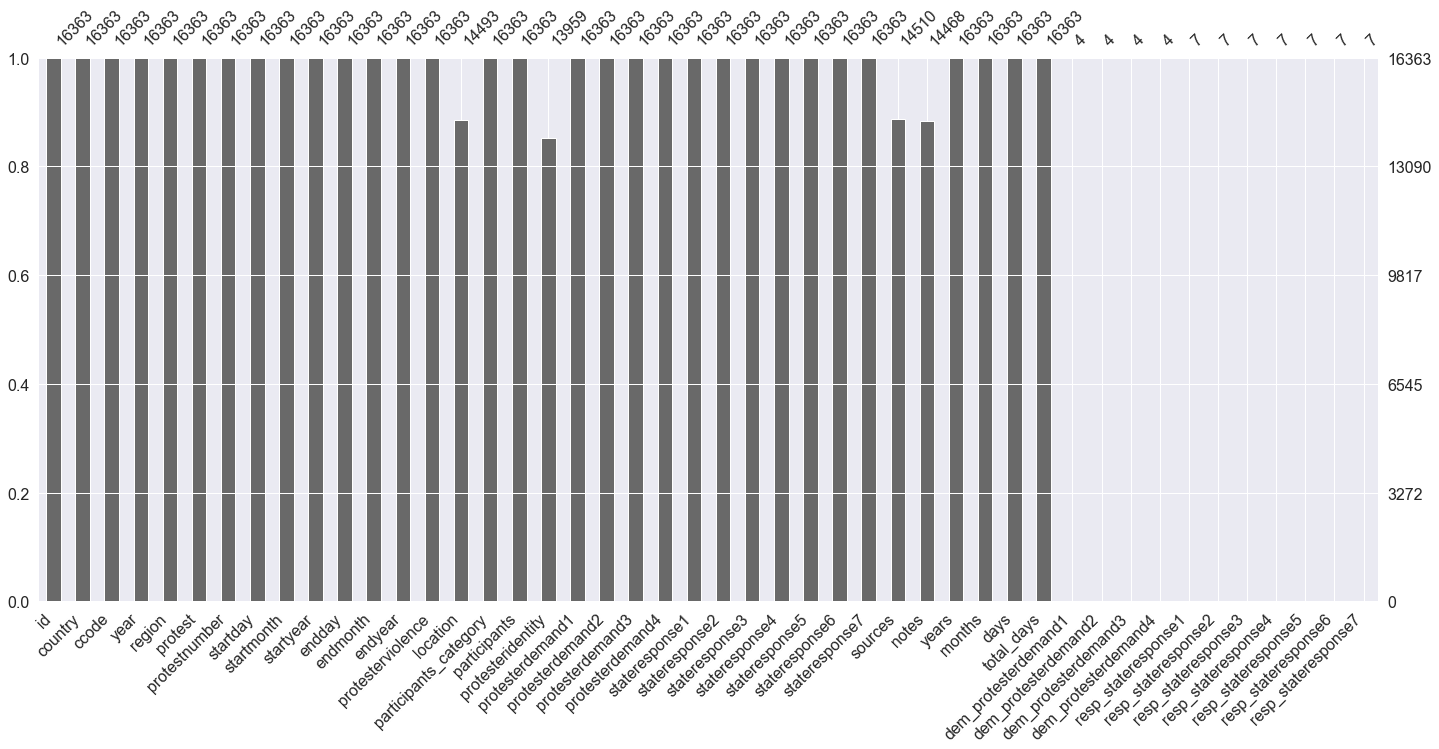

In [13]:
msno.bar(df);

# Export CSV to data folder

In [14]:
df.to_csv('../data/base_df.csv')